In [2]:
#%pip install Scikit-Learn Pandas Numpy Matplotlib Seaborn



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


### Carga de datos

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Sample_Data/entrada_salida_pasajeros.csv')

In [7]:
df.head()

,AEROPUERTOS,ENTRADAS,SALIDAS,MES,AÑO,Unnamed: 5
0,PUNTA CANA,322652,345654,ENERO,2017,NaN
1,LAS AMERICAS (JFPG),155261,185174,ENERO,2017,NaN
2,CIBAO,54399,66235,ENERO,2017,NaN
3,GREGORIO LUPERÓN,63824,65470,ENERO,2017,NaN
4,LA ROMANA,15827,17078,ENERO,2017,NaN


In [ ]:
df.info()

### Preprocesamiento

In [8]:
df.drop('Unnamed: 5', axis=1, inplace=True)


df = df.astype({
    'AEROPUERTOS': 'string',
    'MES': 'string',
    'AÑO': 'int'
})


df['ENTRADAS'] = df['ENTRADAS'].str.replace(',', '').astype(float).astype(int)
df['SALIDAS'] = df['SALIDAS'].str.replace(',', '').astype(float).astype(int)
df['AEROPUERTOS'] = df['AEROPUERTOS'].replace('LAS AMERICAS (JFPG)', 'LAS AMERICAS')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AEROPUERTOS  849 non-null    object
 1   ENTRADAS     849 non-null    object
 2   SALIDAS      849 non-null    object
 3   MES          849 non-null    object
 4   AÑO          849 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 33.3+ KB


In [15]:
df.head()

,AEROPUERTOS,ENTRADAS,SALIDAS,MES,AÑO
0,PUNTA CANA,322652,345654,ENERO,2017
1,LAS AMERICAS (JFPG),155261,185174,ENERO,2017
2,CIBAO,54399,66235,ENERO,2017
3,GREGORIO LUPERÓN,63824,65470,ENERO,2017
4,LA ROMANA,15827,17078,ENERO,2017


In [16]:
df.describe()

,ENTRADAS,SALIDAS,AÑO
count,849.000000,849.000000,849.000000
mean,63293.916372,64201.557126,2020.579505
std,105718.460420,106850.827774,2.273432
min,0.000000,0.000000,2017.000000
25%,257.000000,349.000000,2019.000000
50%,6612.000000,6741.000000,2021.000000
75%,72414.000000,74481.000000,2023.000000
max,511267.000000,518624.000000,2024.000000


### Distribución de Datos

array([[<Axes: title={'center': 'ENTRADAS'}>,
        <Axes: title={'center': 'SALIDAS'}>],
       [<Axes: title={'center': 'AÑO'}>, <Axes: >]], dtype=object)

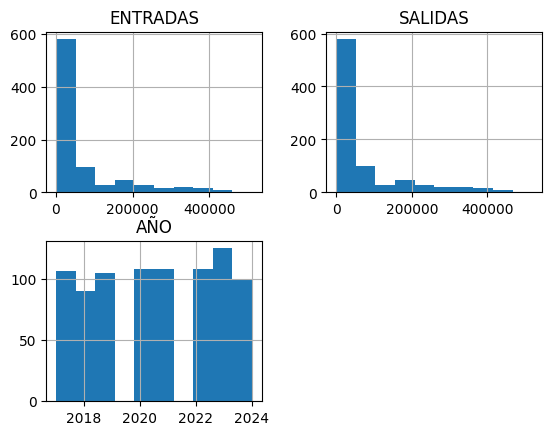

In [17]:
df.hist()

### Detección de Valores Atípicos

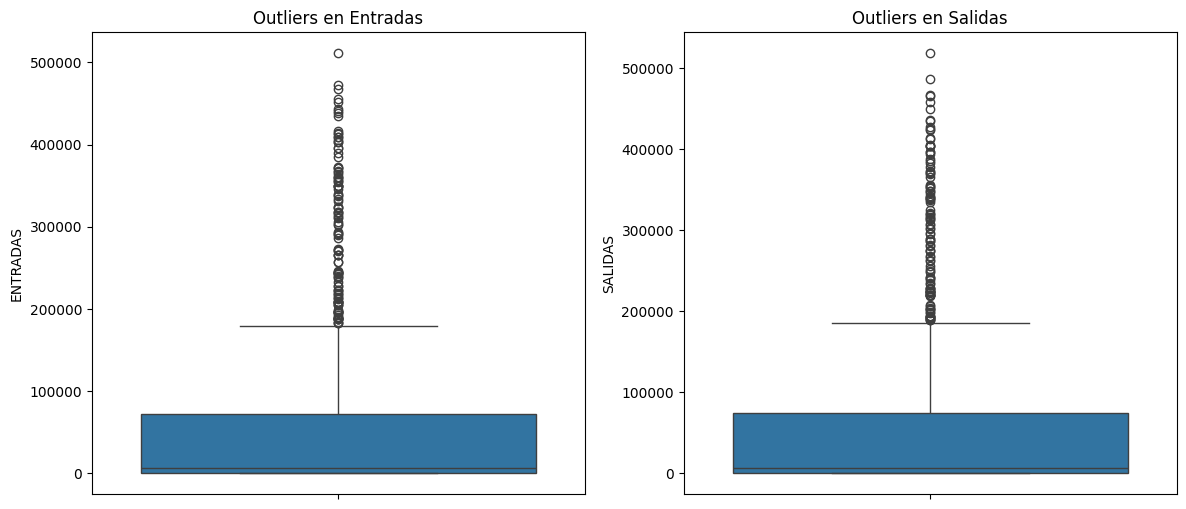

In [18]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='ENTRADAS')
plt.title('Outliers en Entradas')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='SALIDAS')
plt.title('Outliers en Salidas')

plt.show()

# Detectar outliers usando IQR

In [19]:
Q1_entradas = df['ENTRADAS'].quantile(0.25)
Q3_entradas = df['ENTRADAS'].quantile(0.75)
IQR_entradas  = Q3_entradas - Q1_entradas

lower_bound_entradas = Q1_entradas - 1.5 * IQR_entradas
upper_bound_entradas = Q3_entradas + 1.5 * IQR_entradas

outliers_entradas = df[(df['ENTRADAS'] < lower_bound_entradas) |
                       (df['ENTRADAS'] > upper_bound_entradas)]
outliers_entradas

,AEROPUERTOS,ENTRADAS,SALIDAS,MES,AÑO
0,PUNTA CANA,322652,345654,ENERO,2017
8,PUNTA CANA,314069,312584,FEBRERO,2017
17,PUNTA CANA,349221,356245,MARZO,2017
26,PUNTA CANA,338691,354872,ABRIL,2017
35,PUNTA CANA,290685,295821,MAYO,2017
...,...,...,...,...,...
817,LAS AMERICAS,271743,286760,JULIO,2024
827,PUNTA CANA,389436,423753,AGOSTO,2024
828,LAS AMERICAS,243645,281689,AGOSTO,2024
838,PUNTA CANA,272847,296623,SEPTIEMBRE,2024


In [20]:
Q1_salidas = df['SALIDAS'].quantile(0.25)
Q3_salidas = df['SALIDAS'].quantile(0.75)
IQR_salidas = Q3_salidas - Q1_salidas

lower_bound_salidas  = Q1_salidas - 1.5 * IQR_salidas
upper_bound_salidas = Q3_salidas + 1.5 * IQR_salidas

outliers_salidas = df[(df['SALIDAS'] < lower_bound_salidas) | (df['SALIDAS'] > upper_bound_salidas)]
outliers_salidas

,AEROPUERTOS,ENTRADAS,SALIDAS,MES,AÑO
0,PUNTA CANA,322652,345654,ENERO,2017
8,PUNTA CANA,314069,312584,FEBRERO,2017
17,PUNTA CANA,349221,356245,MARZO,2017
26,PUNTA CANA,338691,354872,ABRIL,2017
35,PUNTA CANA,290685,295821,MAYO,2017
...,...,...,...,...,...
817,LAS AMERICAS,271743,286760,JULIO,2024
827,PUNTA CANA,389436,423753,AGOSTO,2024
828,LAS AMERICAS,243645,281689,AGOSTO,2024
838,PUNTA CANA,272847,296623,SEPTIEMBRE,2024


In [21]:
# Combinar y eliminar duplicados para un análisis conjunto de outliers
outliers_combined = pd.concat([outliers_entradas, outliers_salidas]).drop_duplicates()

# Verificación
print("Outliers en 'ENTRADAS':\n", outliers_entradas)
print("\nOutliers en 'SALIDAS':\n", outliers_salidas)
print("\nOutliers combinados:\n", outliers_combined)

Outliers en 'ENTRADAS':
       AEROPUERTOS  ENTRADAS  SALIDAS         MES   AÑO
0      PUNTA CANA    322652   345654       ENERO  2017
8      PUNTA CANA    314069   312584     FEBRERO  2017
17     PUNTA CANA    349221   356245       MARZO  2017
26     PUNTA CANA    338691   354872       ABRIL  2017
35     PUNTA CANA    290685   295821        MAYO  2017
..            ...       ...      ...         ...   ...
817  LAS AMERICAS    271743   286760       JULIO  2024
827    PUNTA CANA    389436   423753      AGOSTO  2024
828  LAS AMERICAS    243645   281689      AGOSTO  2024
838    PUNTA CANA    272847   296623  SEPTIEMBRE  2024
839  LAS AMERICAS    188232   229010  SEPTIEMBRE  2024

[118 rows x 5 columns]

Outliers en 'SALIDAS':
       AEROPUERTOS  ENTRADAS  SALIDAS         MES   AÑO
0      PUNTA CANA    322652   345654       ENERO  2017
8      PUNTA CANA    314069   312584     FEBRERO  2017
17     PUNTA CANA    349221   356245       MARZO  2017
26     PUNTA CANA    338691   354872       ABR

In [22]:
outliers_combined.describe()

,ENTRADAS,SALIDAS,AÑO
count,126.000000,126.000000,126.000000
mean,286311.674603,289376.055556,2020.896825
std,87418.935812,87259.848490,2.375978
min,145456.000000,149943.000000,2017.000000
25%,207884.000000,219578.500000,2019.000000
50%,271060.000000,277434.000000,2022.000000
75%,355487.000000,352940.750000,2023.000000
max,511267.000000,518624.000000,2024.000000


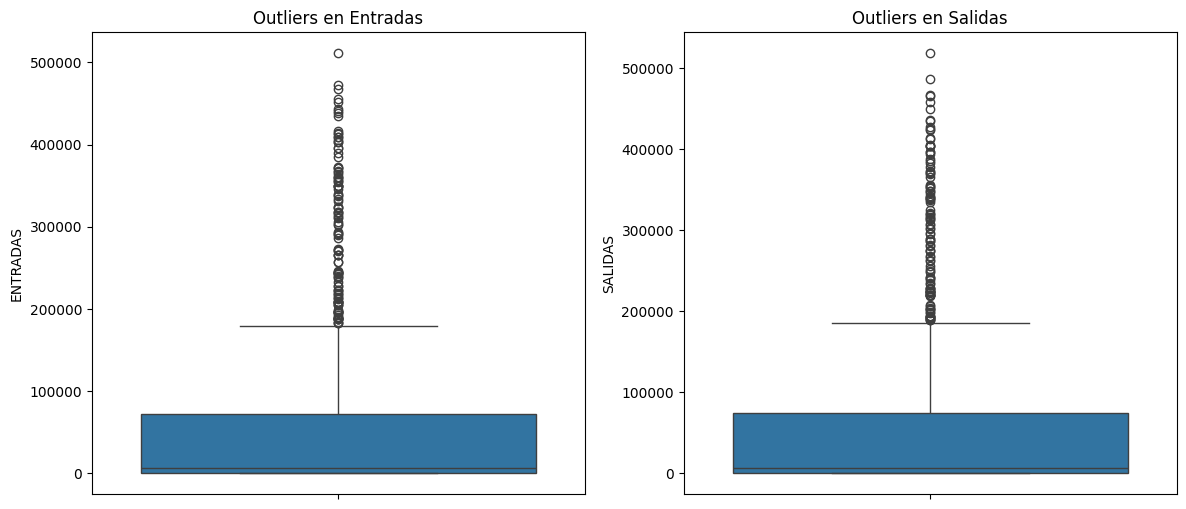

In [23]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='ENTRADAS')
plt.title('Outliers en Entradas')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='SALIDAS')
plt.title('Outliers en Salidas')

plt.show()

### Análisis Temporal de Outliers

- Explorar la distribcuion a lo largo del tiempo
- Verificar patrones estacionales

<ipython-input-24-66ab6b335206>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outliers_mes_anio = outliers_combined.groupby(['MES', 'AÑO']).size().reset_index(name='COUNT')


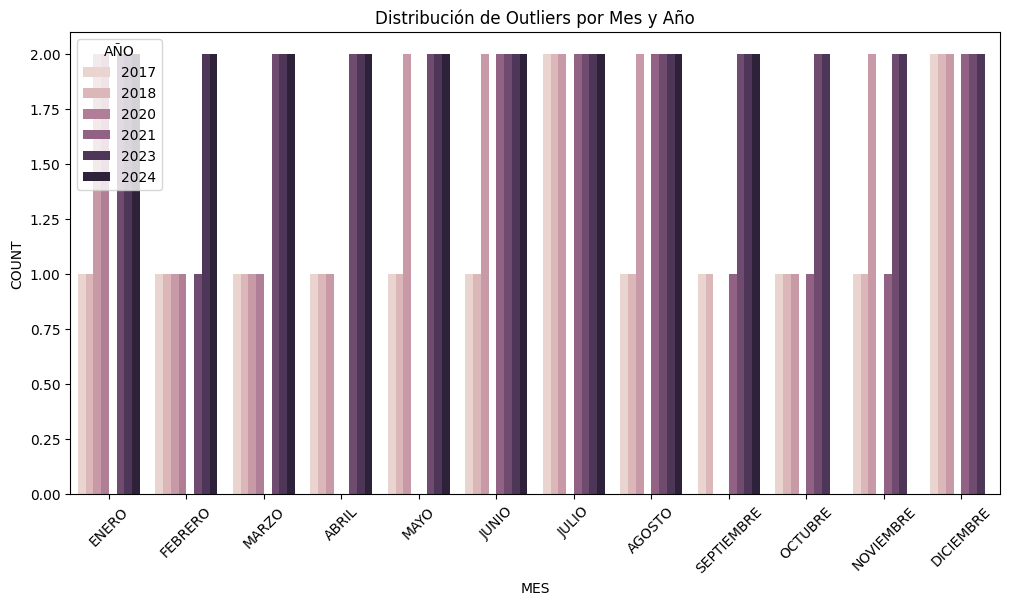

In [24]:
# Agrupar outliers por mes y año
outliers_combined['MES'] = pd.Categorical(outliers_combined['MES'],
                                          categories=['ENERO', 'FEBRERO',
                                                      'MARZO', 'ABRIL', 'MAYO',
                                                      'JUNIO','JULIO', 'AGOSTO',
                                                      'SEPTIEMBRE', 'OCTUBRE',
                                                      'NOVIEMBRE', 'DICIEMBRE'
                                                     ], ordered=True)

# Contar outliers por mes y año
outliers_mes_anio = outliers_combined.groupby(['MES', 'AÑO']).size().reset_index(name='COUNT')


# Visualizar la cantidad de outliers por mes y año
plt.figure(figsize=(12, 6))
sns.barplot(data=outliers_mes_anio, x='MES', y='COUNT', hue='AÑO')
plt.title('Distribución de Outliers por Mes y Año')
plt.xticks(rotation=45)
plt.show()



# Posibles Interpretaciones:
- **Patrones Estacionales**: Si los outliers se repiten en los mismos meses a lo largo de diferentes años, es probable que estén asociados con picos estacionales, como vacaciones o festividades que afectan el tráfico de pasajeros.

- **Impacto de Eventos Extraordinarios**: Los años con una menor cantidad de outliers, como 2020, pueden estar asociados con eventos de gran impacto como la pandemia. Esto podría señalar una reducción en el tráfico o una variabilidad más controlada en esos meses.

- **Recuperación o Incremento Reciente**: Años como 2023 y 2024 con más outliers en ciertos meses pueden indicar una recuperación en el tráfico de pasajeros o la influencia de eventos recientes.

## Desglose por aeropuertos

<ipython-input-25-ab95974c3304>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_por_aeropuerto.index,


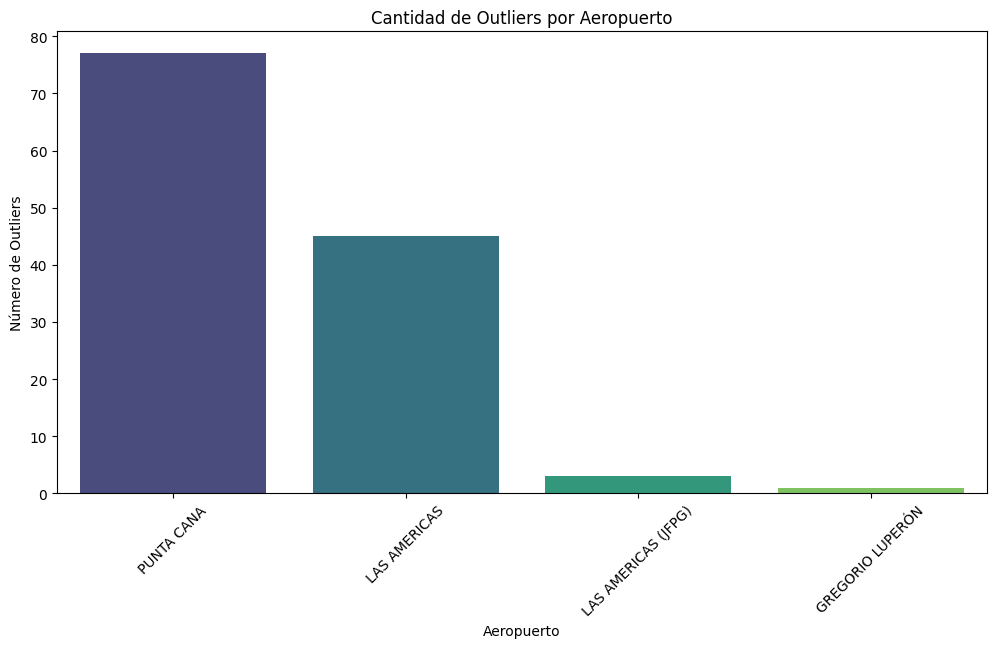

In [25]:
# Contar outliers por aeropuerto
outliers_por_aeropuerto = outliers_combined['AEROPUERTOS'].value_counts()

# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=outliers_por_aeropuerto.index,
            y=outliers_por_aeropuerto.values, palette='viridis')
plt.title('Cantidad de Outliers por Aeropuerto')
plt.xlabel('Aeropuerto')
plt.ylabel('Número de Outliers')
plt.xticks(rotation=45)
plt.show()

## Analisis general

<ipython-input-26-2258def0926d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outliers_por_aeropuerto_mes_anio = outliers_combined.groupby(['AEROPUERTOS', 'AÑO', 'MES']).size().reset_index(name='COUNT')


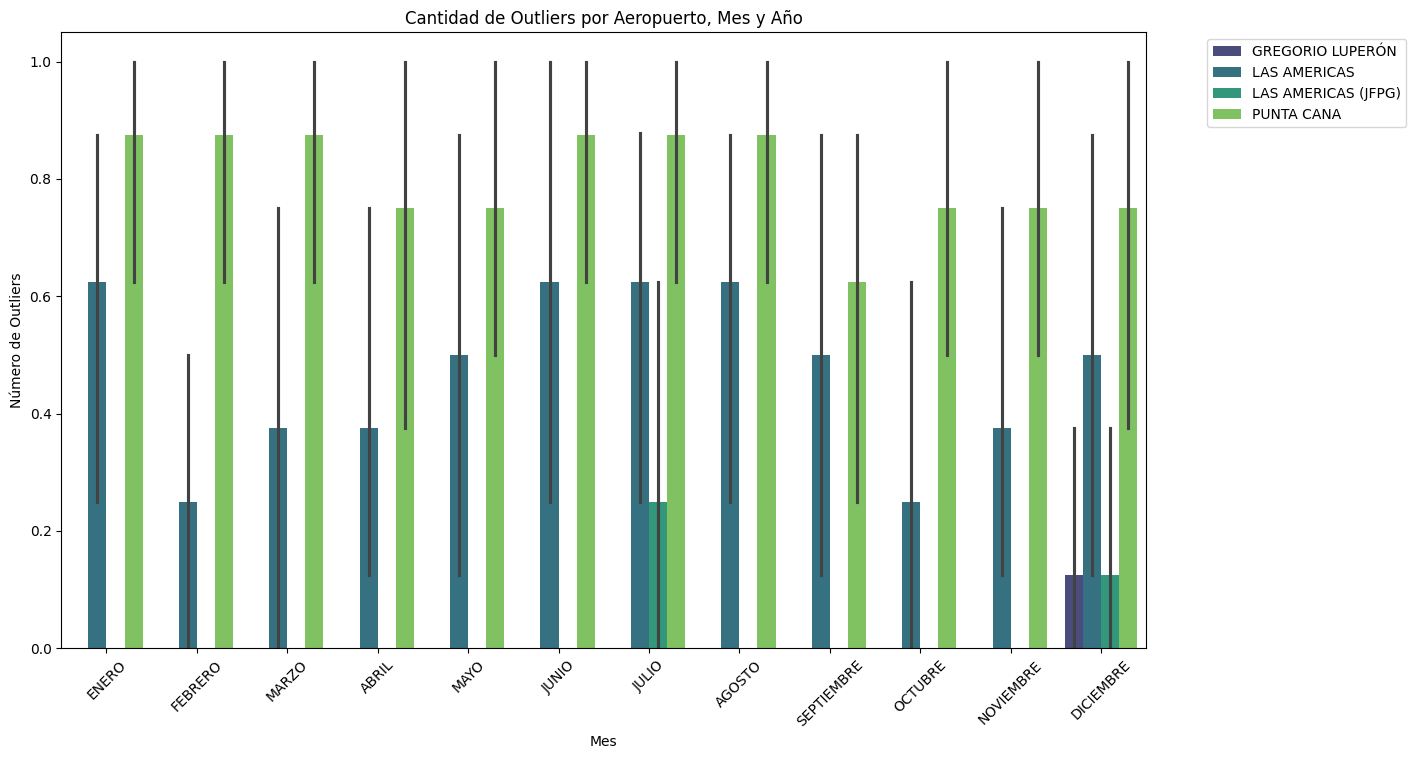

In [26]:
# Contar el número de outliers por aeropuerto, mes y año
outliers_por_aeropuerto_mes_anio = outliers_combined.groupby(['AEROPUERTOS', 'AÑO', 'MES']).size().reset_index(name='COUNT')

# Visualizar los resultados con un gráfico de barras agrupado
plt.figure(figsize=(14, 8))
sns.barplot(data=outliers_por_aeropuerto_mes_anio, x='MES', y='COUNT',
            hue='AEROPUERTOS', palette='viridis')
plt.title('Cantidad de Outliers por Aeropuerto, Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Número de Outliers')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Conslusiones del analisis de outliers

- **Coincidencias con Períodos de Alto Tráfico:** Los outliers en aeropuertos como Punta Cana y Las Américas coinciden con los meses de alto tráfico identificados previamente, lo que sugiere que estos outliers representan picos de tráfico legítimos y no necesariamente datos anómalos que deban ser eliminados.

- **Patrones Estacionales:** La presencia de outliers en meses de alta demanda turística confirma que estos valores extremos reflejan un comportamiento estacional importante y deberían considerarse en tu análisis de modelos de predicción, especialmente si estás interesado en predecir picos de tráfico.

# Preparar un Modelo de Predicción que Considere los Patrones Estacionales


In [27]:
df_copy = df.copy()

In [28]:
df_copy.head()

,AEROPUERTOS,ENTRADAS,SALIDAS,MES,AÑO
0,PUNTA CANA,322652,345654,ENERO,2017
1,LAS AMERICAS (JFPG),155261,185174,ENERO,2017
2,CIBAO,54399,66235,ENERO,2017
3,GREGORIO LUPERÓN,63824,65470,ENERO,2017
4,LA ROMANA,15827,17078,ENERO,2017


In [29]:
df_copy['AEROPUERTOS'] = df_copy['AEROPUERTOS'].replace('LAS AMERICAS (JFPG)', 'LAS AMERICAS')
df_copy.head()

,AEROPUERTOS,ENTRADAS,SALIDAS,MES,AÑO
0,PUNTA CANA,322652,345654,ENERO,2017
1,LAS AMERICAS,155261,185174,ENERO,2017
2,CIBAO,54399,66235,ENERO,2017
3,GREGORIO LUPERÓN,63824,65470,ENERO,2017
4,LA ROMANA,15827,17078,ENERO,2017


In [30]:
# Definir meses de temporada alta, media y baja
temporada_alta = ['DICIEMBRE', 'JULIO', 'AGOSTO', 'ENERO']
temporada_media = ['NOVIEMBRE', 'JUNIO', 'SEPTIEMBRE']
temporada_baja = ['FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'OCTUBRE']

# Crear una función que asigne el nivel de temporada
def clasificacion_temporada(mes):
    if mes in temporada_alta:
        return 2
    elif mes in temporada_media:
        return 1
    else:
        return 0

# Aplicar la función al DataFrame para crear la columna 'NIVEL_TEMPORADA'
df_copy['NIVEL_TEMPORADA'] = df_copy['MES'].apply(clasificacion_temporada)
df_copy[['MES', 'NIVEL_TEMPORADA']].head()

,MES,NIVEL_TEMPORADA
0,ENERO,2
1,ENERO,2
2,ENERO,2
3,ENERO,2
4,ENERO,2


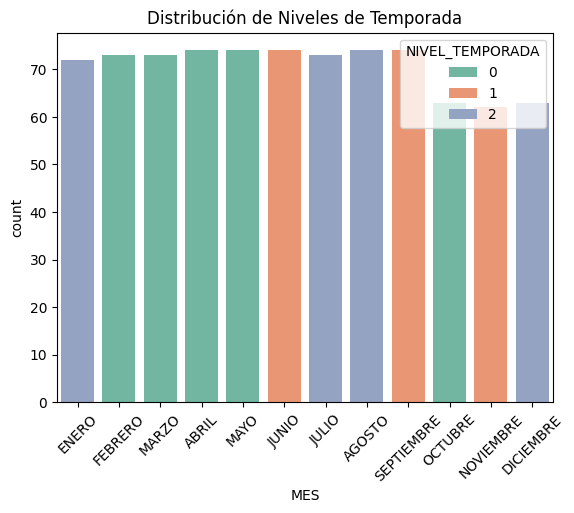

In [31]:
sns.countplot(x='MES', hue='NIVEL_TEMPORADA', data=df_copy, palette='Set2')
plt.title('Distribución de Niveles de Temporada')
plt.xticks(rotation=45)
plt.show()

## Modelo basado en RandomForestRegressor

In [32]:
# Codificar la columna 'AEROPUERTOS' como dummies (One-Hot Encoding)
df_encoded = pd.get_dummies(df_copy, columns=['AEROPUERTOS'], drop_first=True)

# Seleccionar las características de entrada y la variable target
X = df_encoded[['AÑO', 'NIVEL_TEMPORADA'] + [col for col in df_encoded.columns if 'AEROPUERTOS_' in col]]
y = df_encoded['ENTRADAS']

X.head()
#print(y.head()



,AÑO,NIVEL_TEMPORADA,AEROPUERTOS_AEROPUERTO DOMESTICO CABO ROJO,AEROPUERTOS_AEROPUERTO DOMÉSTICO ARROLLO BARRIL,AEROPUERTOS_AEROPUERTO DOMÉSTICO ARROYO BARRIL,AEROPUERTOS_AEROPUERTO DOMÉSTICO EXPEDICIÓN 14 DE JUNIO,AEROPUERTOS_CIBAO,AEROPUERTOS_GREGORIO LUPERON,AEROPUERTOS_GREGORIO LUPERÓN,AEROPUERTOS_JOAQUIN BALAGUER,AEROPUERTOS_JOAQUÍN BALAGUER,AEROPUERTOS_JUAN BOSCH,AEROPUERTOS_JUAN BOSCH (EL CATEY),AEROPUERTOS_LA ROMANA,AEROPUERTOS_LAS AMERICAS,AEROPUERTOS_MARIA MONTEZ,AEROPUERTOS_MARIA MONTÉZ,AEROPUERTOS_PUNTA CANA
0,2017,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2017,2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,2017,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,2017,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,2017,2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [33]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)



# Hacer predicciones
y_pred = modelo_rf.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 13127.448245458787
Mean Squared Error: 902928139.3547354


# Optimización de Hiperparámetros

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)

Mejores parámetros encontrados: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [35]:
# Entrenar el modelo con los mejores parámetros encontrados
modelo_optimizado = RandomForestRegressor(
    bootstrap=True,
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Ajustar el modelo optimizado en el conjunto de entrenamiento
modelo_optimizado.fit(X_train, y_train)

# Hacer predicciones con el modelo optimizado
y_pred_optimizado = modelo_optimizado.predict(X_test)

# Evaluar el rendimiento del modelo optimizado
mae_optimizado = mean_absolute_error(y_test, y_pred_optimizado)
mse_optimizado = mean_squared_error(y_test, y_pred_optimizado)

print(f'Mean Absolute Error (MAE) optimizado: {mae_optimizado}')
print(f'Mean Squared Error (MSE) optimizado: {mse_optimizado}')


Mean Absolute Error (MAE) optimizado: 12594.497481809205
Mean Squared Error (MSE) optimizado: 815729619.0595697


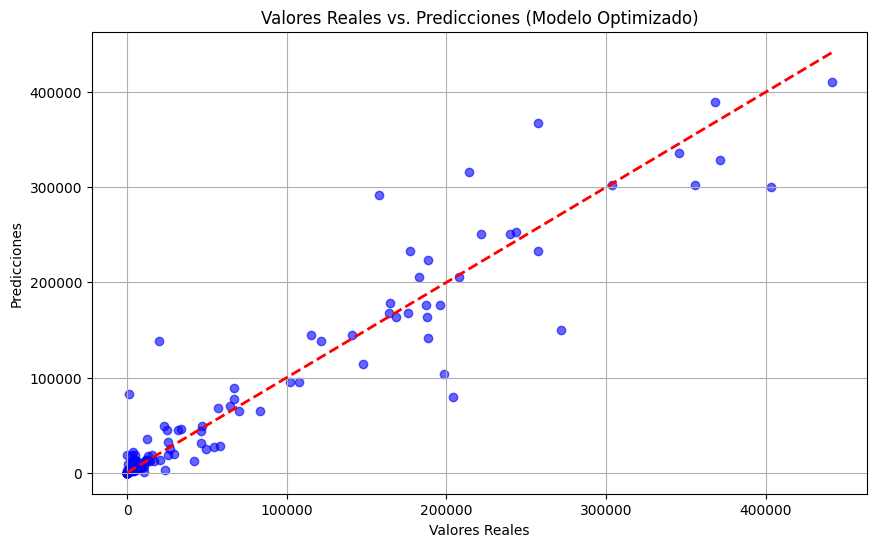

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimizado, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones (Modelo Optimizado)')
plt.grid(True)
plt.show()

# Aplicar transformacion logaritmica

In [40]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Entrenar el modelo con los mejores parámetros encontrados
modelo_optimizado_log = RandomForestRegressor(
    bootstrap=True,
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

modelo_optimizado_log.fit(X_train, y_train_log)

y_pred_log = modelo_optimizado_log.predict(X_test)

y_pred_invertido = np.expm1(y_pred_log)
y_test_invertido = np.expm1(y_test_log)

# Evaluar el rendimiento en la escala original
mae_log = mean_absolute_error(y_test_invertido, y_pred_invertido)
mse_log = mean_squared_error(y_test_invertido, y_pred_invertido)

print(f'Mean Absolute Error (MAE) con transformación logarítmica: {mae_log}')
print(f'Mean Squared Error (MSE) con transformación logarítmica: {mse_log}')

Mean Absolute Error (MAE) con transformación logarítmica: 11768.265590721774
Mean Squared Error (MSE) con transformación logarítmica: 772365829.5701927


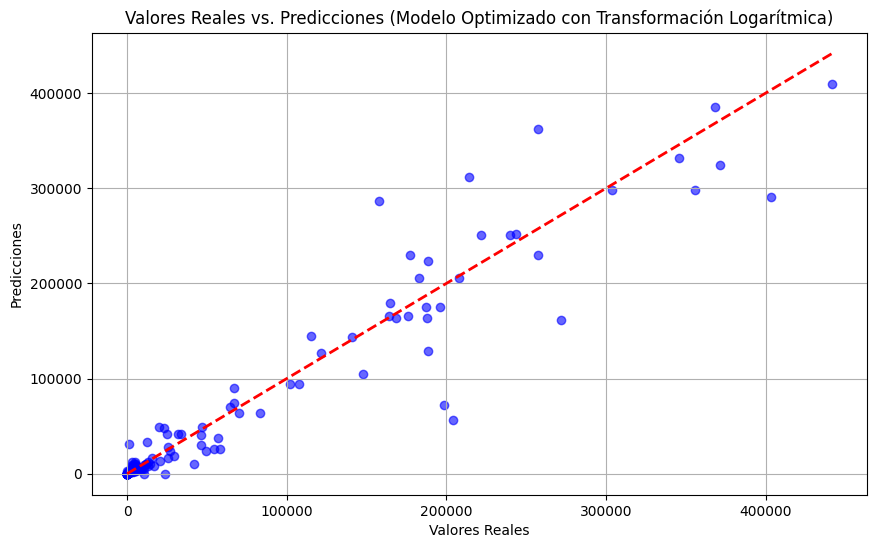

In [43]:
# Gráfico de dispersión de valores reales vs. predicciones después de la transformación logarítmica
plt.figure(figsize=(10, 6))
plt.scatter(y_test_invertido, y_pred_invertido, alpha=0.6, color='b')
plt.plot([y_test_invertido.min(), y_test_invertido.max()], [y_test_invertido.min(), y_test_invertido.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones (Modelo Optimizado con Transformación Logarítmica)')
plt.grid(True)
plt.show()


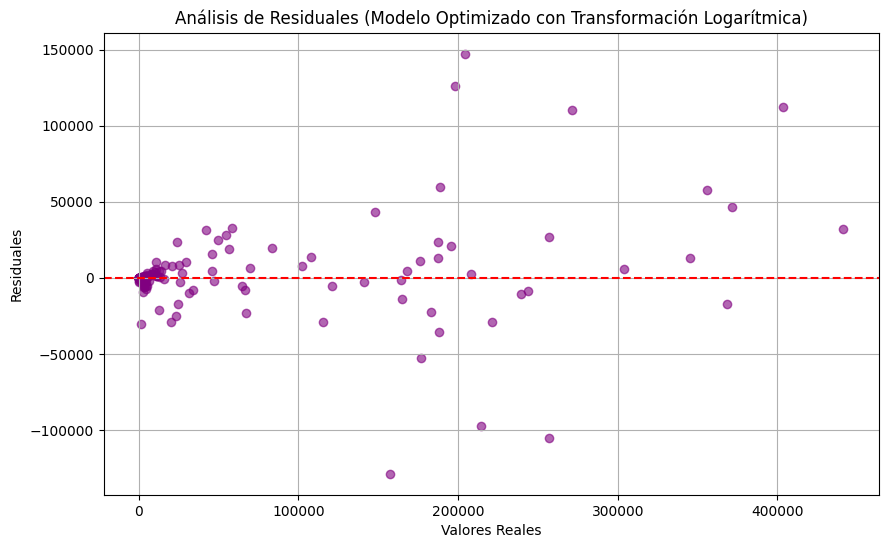

In [44]:
residuals = y_test_invertido - y_pred_invertido
plt.figure(figsize=(10, 6))
plt.scatter(y_test_invertido, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')
plt.title('Análisis de Residuales (Modelo Optimizado con Transformación Logarítmica)')
plt.grid(True)
plt.show()

### Evaluamos la importancia de las caracteristicas

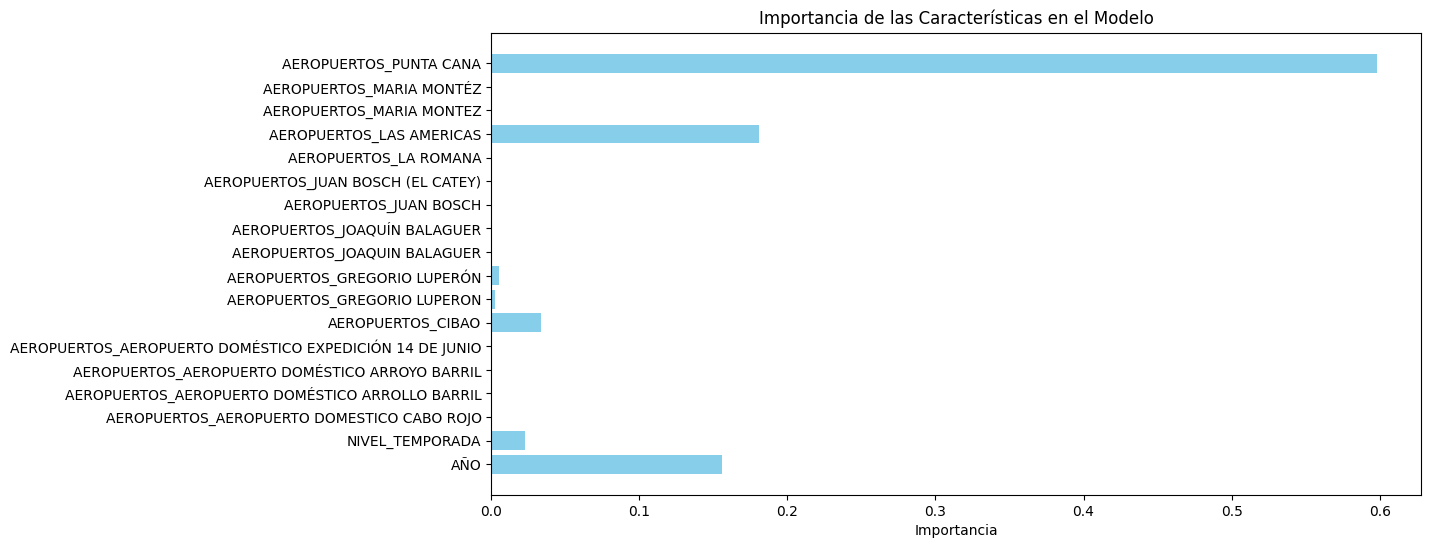

In [36]:
importancias = modelo_rf.feature_importances_
caracteristicas = X.columns
plt.figure(figsize=(12, 6))
plt.barh(caracteristicas, importancias, color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características en el Modelo')
plt.show()